In [1]:
%run my_functions.ipynb

In [2]:
#This is all the clauses from hybrid problem 5
sat_formula = [[1,2,3],[-1,2,3],[1,-2,3],[1,2,-3],[-1,-2,-3]]

In [3]:
all_soln = ['000','001','010','011','100','101','110','111']
brute_soln = classical_sat_checker(sat_formula,all_soln)
actual_soln = len(brute_soln)
actual_soln

3

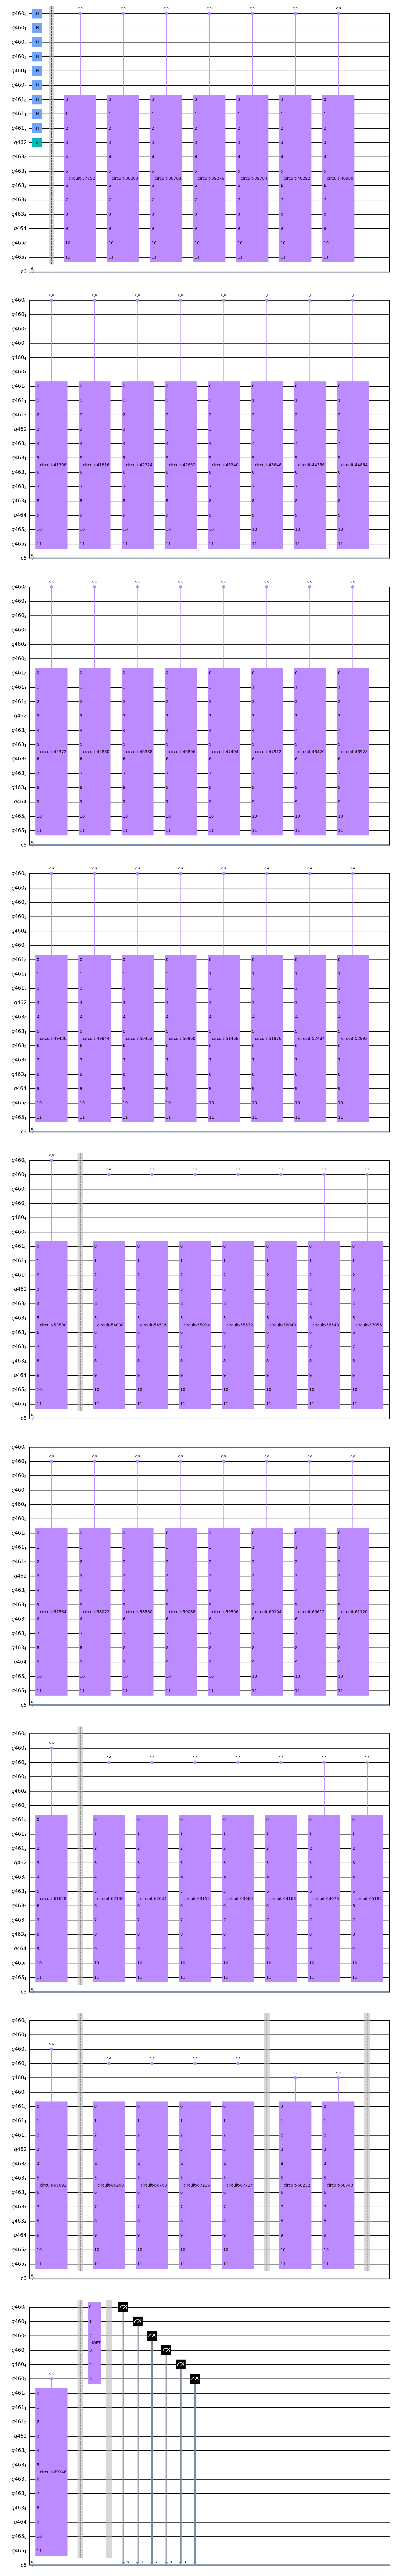

In [17]:
m = 5
e = 1/10
circuit = quantum_counting(sat_formula,m,e)
circuit.draw('mpl')

In [18]:
counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots=5000).result().get_counts()
measured_str = max(counts, key=counts.get)[::-1]
measured_int = int(measured_str,2)
measured_int

42

In [19]:
#Number of marked elements
t = m + math.floor(math.log(2+0.5/e))
n = max(max(sat_clause) for sat_clause in sat_formula)
theta = (measured_int/(2**t))*math.pi
N = 2**n
M = N * (math.sin(theta/2))**2
numsols = round(N-M)
numsols

2

In [20]:
round(M)

6

### Finding the behaviour of num of solutions as a function of m

In [31]:
n = max(max(sat_clause) for sat_clause in sat_formula)
N = 2**n
numsols = []
sols_rem = []
i = list(range(1,10))
for m in i:
    e = 1/10
    circuit = quantum_counting(sat_formula,m,e)
    counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
    measured_str = max(counts, key=counts.get)[::-1]
    measured_int = int(measured_str,2)
    #Number of marked elements
    t = m + math.floor(math.log(2+0.5/e))
    theta = (measured_int/(2**t))*math.pi
    M = N * (math.sin(theta/2))**2
    numsols.append(round(N-M))
    sols_rem.append(M)


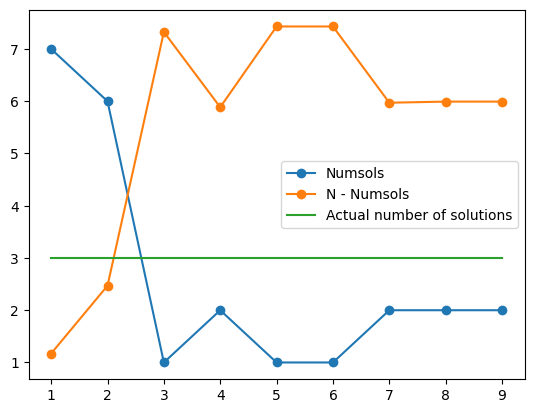

In [32]:
solution = [actual_soln]*len(i)
plt.plot(i,numsols, '-o', label='Numsols')
plt.plot(i,sols_rem,'-o', label='N - Numsols')
plt.plot(i,solution,label='Actual number of solutions')
plt.legend()

In [33]:
theta = []
num_iter = []
for i in range(len(numsols)):
    theta.append(math.sqrt(numsols[i]/N))
    num_iter.append(round(math.pi/(4*theta[i]) - 0.5))

In [34]:
theta

[0.9354143466934853,
 0.8660254037844386,
 0.3535533905932738,
 0.5,
 0.3535533905932738,
 0.3535533905932738,
 0.5,
 0.5,
 0.5]

In [35]:
num_iter

[0, 0, 2, 1, 2, 2, 1, 1, 1]